Github Link: https://github.com/AlagappanS/Programming-for-Data-Science/blob/master/TakeHomeExam_Alagappan.ipynb

# Part 1: 
In your project you have been working with a bias dataset. Most probabely suupervised models were underfit. You should remember that this is a real dataset, and in real life most of the time you dont have access to clean and unbias dataset. In situations like this, none of the regression models will have a good fit for the dataset due to the large predence of the 0s. In the first part of this take-home exam, you are asked to be creative, and find a solution for this problem. 

For this dataset, you can break the problem, into a two-step machine learning model. 

First step is to classify the data points as positive revenue and zero revenue. This simply is a binary classification. You should remember that when you are dealing with biased datasets, accuracy is not a reliable scoring metric. So look for a robust scoring function. 

Next, you need to build a regression model to postprocess classification results. Here is a flow chart to show you the outline of the model. 

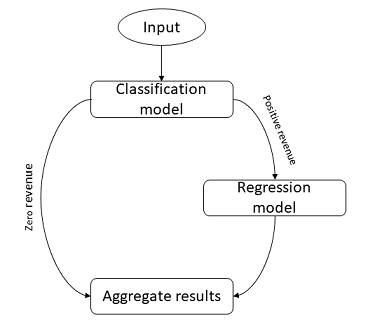

# Part 2
In this part you will create a Python function ``plot_decision_boundary`` that will accepts a machine learning model, feature set ``X``, and target set ``y`` as input and will plot the decision boundary of the input machine learning model  on ``(X,y)``. The following is a sample run of this function: 

```Python
%matplotlib inline
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision boundary
plot_decision_boundary(X, y, clf=svm)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')```

Sample output: 
![decision_boundary.png](attachment:decision_boundary.png)

In [1]:
def plot_decision_boundary():
    """
    FIXME: complete this function.
    """
    pass

## PART 1 ##

IMPORTING PACKAGES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [3]:
df = pd.read_csv('data.csv')
df.head(2)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1


DATA CLEANING

In [4]:
df1 = df.copy()[['channelGrouping', 'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite', 'totals_transactionRevenue', 'totals_transactions']]
cg = pd.get_dummies(df1['channelGrouping'], prefix= 'cg')
df1 = pd.concat([cg, df1], axis=1)
df1 = df1.drop('channelGrouping', axis=1).fillna(0)
df1.head(2)

,cg_Affiliates,cg_Direct,cg_Display,cg_Organic Search,cg_Paid Search,cg_Referral,cg_Social,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions
0,0,0,0,1,0,0,0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0,0,0,1,0,0.0,2,0.0,2.0,2.0,28.0,0.0,0.0


NORMALIZING JSON

In [5]:
a = pd.io.json.json_normalize(df['trafficSource'].apply(eval))
b = pd.io.json.json_normalize(df['geoNetwork'].apply(eval))
c = pd.io.json.json_normalize(df['device'].apply(eval))
import ast
df['hits'] = df['hits'].apply(ast.literal_eval).str[0]
df['hits'] =df['hits'].apply(lambda x: {'index':np.NaN,'value':np.NaN} if pd.isnull(x) else x)
d = pd.io.json.json_normalize(df['hits'])

trafficSource COLUMN

In [6]:
a['adContent'] = a.adContent.fillna('None')
a['adwordsClickInfo.adNetworkType'] = a['adwordsClickInfo.adNetworkType'].fillna('None')
p = a['adContent'].isin(a['adContent'].value_counts().index[a['adContent'].value_counts()<25])
a['adContent'] [p] = 'Other'
adContent = pd.get_dummies(a['adContent'], prefix= 'adContent')

a['adwordsClickInfo.adNetworkType'].value_counts()
adNetworkType = pd.get_dummies(a['adwordsClickInfo.adNetworkType'], prefix= 'adNetworkType')

source_list = ['google', 'facebook', 'yahoo', 'linkedin', 'youtube']
for source in source_list:
    a.loc[a['source'].str.contains(source), 'source'] = source
p = a['source'].isin(a['source'].value_counts().index[a['source'].value_counts()<25])
a['source'] [p] = 'other'
source = pd.get_dummies(a['source'], prefix= 'source')
medium = pd.get_dummies(a['medium'], prefix= 'medium')
trafficSource = pd.concat([adContent, adNetworkType, source, medium], axis = 1)

trafficSource.head(2)

,adContent_Google Merchandise Collection,adContent_Google Merchandise Store,adContent_None,adContent_Other,adNetworkType_Content,adNetworkType_Google Search,adNetworkType_None,source_(direct),source_Partners,source_baidu,...,source_reddit.com,source_siliconvalley.about.com,source_yahoo,source_youtube,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Visualizing trafficinfo

Combined Google and youtube sources contribute to over 50% of the website traffic, followed be users who visit the website directly.
Referal and organic media have lead to 10,000 users visiting the website.

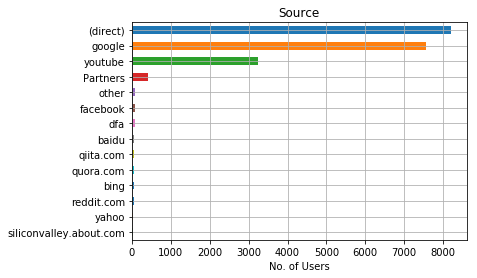

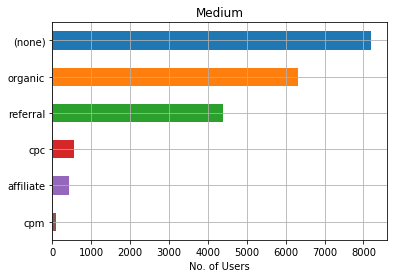

In [7]:
for i in a[['source', 'medium']]:
    plt.figure()
    plt.xlabel('No. of Users')
    plt.title(str.capitalize(i))
    a[i].value_counts().plot(kind='barh', grid = True)
    plt.gca().invert_yaxis()  

geoNetwork COLUMN

In [8]:
p = b['subContinent'].isin(b['subContinent'].value_counts().index[b['subContinent'].value_counts()<50])
b['subContinent'] [p] = 'other'
p = b['country'].isin(b['country'].value_counts().index[b['country'].value_counts()<100])
b['country'] [p] = 'other'
countries = pd.get_dummies(b['country'], prefix= 'country')
subContinents = pd.get_dummies(b['subContinent'], prefix= 'subContinent')
geo_network = pd.concat([countries, subContinents], axis = 1)

geo_network.head(2)

,country_Argentina,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Czechia,country_France,country_Germany,country_India,...,subContinent_Northern Europe,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,subContinent_other
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualizing geoNetwork data
Graph indicates that >50% of the users in the dataset are from North, Central and South Americas.


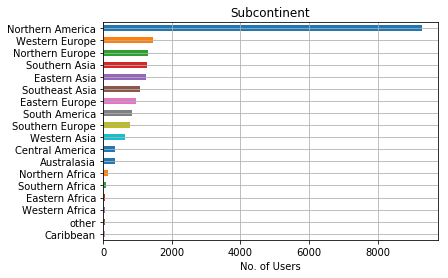

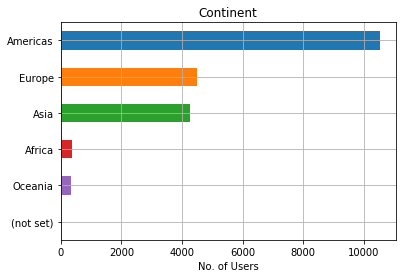

In [9]:
for i in b[['subContinent', 'continent']]:
    plt.figure()
    plt.xlabel('No. of Users')
    plt.title(str.capitalize(i))
    b[i].value_counts().plot(kind='barh', grid = True)
    plt.gca().invert_yaxis()  

device Column

In [10]:
p = c['browser'].isin(c['browser'].value_counts().index[c['browser'].value_counts()<150])
c['browser'] [p] = 'other'
p = c['deviceCategory'].isin(c['deviceCategory'].value_counts().index[c['deviceCategory'].value_counts()<150])
c['deviceCategory'] [p] = 'other'
p = c['operatingSystem'].isin(c['operatingSystem'].value_counts().index[c['operatingSystem'].value_counts()<150])
c['operatingSystem'] [p] = 'other'
browsers = pd.get_dummies(c['browser'], prefix= 'browser')
deviceCategories = pd.get_dummies(c['deviceCategory'], prefix= 'device')
operatingSystems = pd.get_dummies(c['operatingSystem'], prefix= 'OS')
device_info = pd.concat([browsers.copy(), deviceCategories.copy(), operatingSystems.copy()], axis = 1)

device_info.head()

,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Opera Mini,browser_Safari,browser_other,device_desktop,device_mobile,device_tablet,OS_Android,OS_Chrome OS,OS_Linux,OS_Macintosh,OS_Windows,OS_iOS,OS_other
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


Visualizing Device data

Google Chrome is the most widely used browser. The dataset contains more Desktop users over mobile users. Therefore Windows and Mac are the most common OS seen in this dataset.

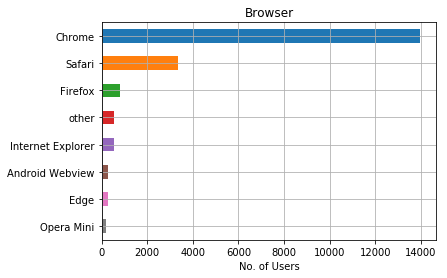

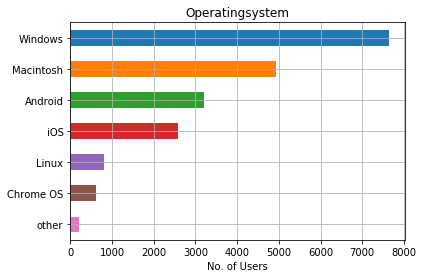

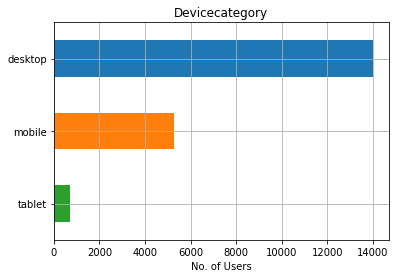

In [11]:
for i in c[['browser', 'operatingSystem', 'deviceCategory']]:
    plt.figure()
    plt.xlabel('No. of Users')
    plt.title(str.capitalize(i))
    c[i].value_counts().plot(kind='barh', grid = True)
    plt.gca().invert_yaxis()    

Channel Grouping COLUMN

This column is converted into a one-hot vector using pd.get_dummies method.

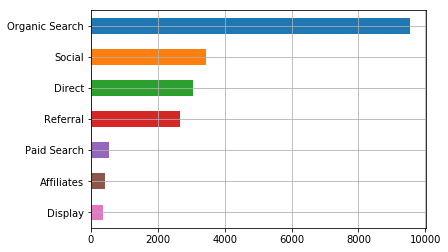

In [12]:
df['channelGrouping'].value_counts().plot(kind='barh', grid = True)
plt.gca().invert_yaxis()

 Custom Dimensions COLUMN
 
We will not be including the Custom Dimensions column for analysis because the data contained here is already available in a more granular level in the geoNetwork column. 

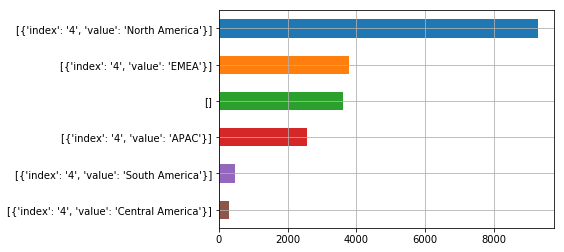

In [13]:
df['customDimensions'].value_counts().plot(kind='barh', grid = True)
plt.gca().invert_yaxis()

In [14]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic

def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic

def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))
def replace(x):
    return  json.loads(x.replace('\'','\"').replace('False', 'false').replace('True'))

In [15]:
d['type'] = d['type'].map({'PAGE': 1, 'EVENT': 0})
d['type'] = d['type'].fillna(0)
d['Source_Web'] = d['dataSource'] == 'web'
d['Source_Web'] = d['Source_Web'].map({True: 1, False: 0})

hits = d[['type', 'Source_Web']]

### Creating final dataframe for analysis ###

In [16]:
df_final = pd.concat([df1, device_info, geo_network, trafficSource, hits], axis=1).fillna(0)
df_final.head()

,cg_Affiliates,cg_Direct,cg_Display,cg_Organic Search,cg_Paid Search,cg_Referral,cg_Social,totals_bounces,totals_hits,totals_newVisits,...,source_yahoo,source_youtube,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,type,Source_Web
0,0,0,0,1,0,0,0,1.0,1,1.0,...,0,0,0,0,0,0,1,0,1.0,1
1,0,0,0,0,0,1,0,0.0,2,0.0,...,0,0,0,0,0,0,0,1,1.0,1
2,0,1,0,0,0,0,0,0.0,2,1.0,...,0,0,1,0,0,0,0,0,1.0,1
3,0,0,0,1,0,0,0,0.0,2,1.0,...,0,0,0,0,0,0,1,0,1.0,1
4,0,0,0,1,0,0,0,0.0,2,1.0,...,0,0,0,0,0,0,1,0,1.0,1


### Summary of df_final###

df_final includes data from the following columns of 'data.csv'

**channelGrouping** - transformed into one-hot vectors.

**device** - transformed select data into one-hot vectors. Redundant / Data-Unavailable columns have been excluded.

**trafficSource** - transformed select data into one-hot vectors. Redundant / Data-Unavailable columns have been excluded.

**geoNetwork** - transformed select data into one-hot vectors. Redundant / Data-Unavailable columns have been excluded.

**hits** - selective columns within hits have be transformed appropriately and used in df_final.

**socialEngagementType **- All values are 'Not socially Engaged'. Therefore the column has been excluded.

**totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite, 
totals_transactions,totals_visits** - The above columns have all been included.

**totals_transactionRevenue ** - value to be predicted, hence included in the dataframe.

**visitId', 'visitNumber', 'visitStartTime', 'date' **- have been exluded for analysis as these values cannot be used in 
prediction.

**customDimensions** - the data contained here is already available in a more granular level in the geoNetwork column. Therefore this column has been exlcluded from the df_final dataframe.

## CLASSIFICATION USING LINEAR SUPPORT VECTOR MACHINE ##

Convert y variable, 'totals_transactionRevenue' to binary values so that we can train a classification model to predict whether a particular record will generate revenue.

Drop original y variable, 'totals_transactionRevenue' from the dataframe because it has been converted into binary values for classification purpose in the 'totals_transactionRevenue_binary' column.

In [17]:
df_classification = df_final.copy()

df_classification['totals_transactionRevenue_binary'] = np.where(df_classification['totals_transactionRevenue']==0, 0, 1)
df_classification = df_classification.drop('totals_transactionRevenue', axis = 1)

df_classification['totals_transactionRevenue_binary'].value_counts()

0    19807
1      193
Name: totals_transactionRevenue_binary, dtype: int64

### EVALUATION STRATEGY ####

The y-variable for classification contains 19,807 zeros and only 193 ones, resulting in an imbalanced or one-sided datset. The **ROC_AUC_score** will be a suitable evalution method for our classification model as the Receiver Operating Characteristic curve plots the True Positives against the True Negatives. The higher the area under the ROC curve, the better the model will be at distinguishing between 1's and 0's or positive revenue and no revenue in this scenario.

Separating feature set (X) and response variable (y) 

In [18]:
X = df_classification.drop('totals_transactionRevenue_binary', axis = 1)
y = df_classification['totals_transactionRevenue_binary']

Splitting dataset into Train and Test
Feature Scaling using MinMax Scaler to shrink the range of all features such that it is between 0 and 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

Importing Packages for Classification using Linear SVC

In [20]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Using Grid Search Cross Validation to find optimal parameters for Classification Model

In [21]:
c_range = [10**-1, 10**0, 10**1]

grid_search_param = {'penalty': ['l1','l2'], 'loss': ['squared_hinge', 'hinge'], 'C': c_range, 'dual': [True, False]}

grid_search_linearSVC = GridSearchCV(LinearSVC(random_state = 0), grid_search_param, cv=5, scoring='roc_auc', n_jobs = -1, error_score=0.0)
grid_search_linearSVC.fit(X_train, y_train)
print("Best Parameters : {}".format(grid_search_linearSVC.best_params_))
print("Best cross_val score : {}".format(grid_search_linearSVC.best_score_))

Best Parameters : {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Best cross_val score : 0.9999059880725855


Predicting Y-variable, totals_transactionRevenue_binary using the model.

Computing Classification metrics

In [22]:
y_hat = grid_search_linearSVC.best_estimator_.predict(scaler.fit_transform(X))

In [23]:
true_negatives, false_positives, false_negatives, true_postives = confusion_matrix(y, y_hat).ravel()
values = [true_negatives, false_positives, false_negatives, true_postives]

true_positive_rate = true_postives/(true_postives+false_negatives)
print('Sensitivity or True Positive Rate, TPR =', true_positive_rate)

true_negative_rate = true_negatives/(true_negatives+false_positives)
print('Specificity or True Negative Rate, TNR =',"%.5f" %true_negative_rate)

precision = true_postives/(true_postives+false_positives)
print('Precision or Positive Predictive Value, PPV =',"%.5f" % precision)

miss_rate = false_negatives / (false_negatives+true_postives)
print('Miss Rate or False Negative Rate, FNR =', miss_rate)

accuracy = (true_postives+true_negatives) / (true_postives+false_positives+true_negatives+false_negatives)
print('Prediction Accuracy =',"%.5f"%  accuracy)

ROC_AUC_Score = roc_auc_score(y, y_hat)
print ('ROC_AUC_Score = ',"%.5f"% roc_auc_score(y, y_hat))

Sensitivity or True Positive Rate, TPR = 1.0
Specificity or True Negative Rate, TNR = 0.99985
Precision or Positive Predictive Value, PPV = 0.98469
Miss Rate or False Negative Rate, FNR = 0.0
Prediction Accuracy = 0.99985
ROC_AUC_Score =  0.99992


Defining plot for confusion matrix

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Visualizing Confusion Matrix

[[19804     3]
 [    0   193]]


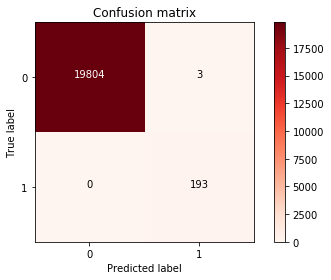

In [25]:
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix')
plt.show()

### INTERPRETATION
Out of the 19807 0-revenue category, the model has predicted 19804 correctly (True Negative) while wrongly pedicting the remaining 3 as records with revenue. The model has predicted all the 193 records with revenue accurately, therefore there are no false negatives.

### CLASSIFICATION EVALUATION ###

An **ROC_AUC score** > 0.999 along with a **zero miss rate** (0 False Negatives) indicates that the Linear Suppot Vector Classification with the parameters: 'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'is a good classifier of this biased datset.

#### DATA PREPROCESSING FOR REGRESSION MODEL ON RECORS WITH POSITIVE REVENUE

Append y-hat to our original df_final

In [26]:
df_final['totals_transactionRevenue_predicted'] = y_hat

SELECTING ONLY RECORDS PREDICTED TO HAVE POSITIVE REVENUE FOR REGRESSION (196 Records)

In [27]:
df_regression = df_final[df_final['totals_transactionRevenue_predicted']==1]
df_regression.shape

(196, 115)

SEPARATING FEATURE SET FROM TARGET VARIABLE

In [28]:
X = df_regression.drop(['totals_transactionRevenue', 'totals_transactionRevenue_predicted'], axis=1)
y = df_regression['totals_transactionRevenue']

TRAIN-TEST SPLIT, FOLLOWED BY FEATURE SCALING

In [29]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

### REGRESSION USING LASSO (Least absolute shrinkage and selection operator)

IMPORTING LASSO

In [30]:
from sklearn.linear_model import Lasso

USING GRID SEARCH CROSS VALIDATION TO FIND OPTIMAL PARAMETERS FOR LASSO REGRESSION

In [31]:
a_range = [10**-2, 10**-1, 10**0, 10**1, 10**2]

lassoreg = Lasso(random_state=0)
lasso_param = {'alpha':a_range ,'fit_intercept':[True,False],'normalize':[True,False]}

grid_search_lasso = GridSearchCV(lassoreg, lasso_param, cv=2, return_train_score=True, n_jobs = -1)
grid_search_lasso.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

lassoreg_accuracy_train = grid_search_lasso.best_estimator_.score(X_train, y_train)
lassoreg_accuracy_test = grid_search_lasso.best_estimator_.score(X_test, y_test)

print('Lasso Regression - Train Accuracy: %.4f'%lassoreg_accuracy_train)
print('Lasso Regression - Test Accuracy: %.4f '%lassoreg_accuracy_test)

Best parameters: {'alpha': 100, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: -0.3198
Lasso Regression - Train Accuracy: 0.3286
Lasso Regression - Test Accuracy: -0.4081 


COMPUTING R-square using the model with best parameters for revenue-positive records

In [32]:
grid_search_lasso.best_estimator_.score(scaler.fit_transform(X), y)

0.31917780361685877

In [33]:
df_regression['lasso_predicted_revenue'] = grid_search_lasso.best_estimator_.predict(scaler.fit_transform(X))
df_regression['lasso_predicted'] = grid_search_lasso.best_estimator_.predict(scaler.fit_transform(X))
df_regression1 = df_regression[['totals_transactionRevenue', 'lasso_predicted']].rename(index=str, columns={"totals_transactionRevenue": "Revenue"}).copy()
df_regression1.index = df_regression1.index.astype(int)
df_regression1.head(2)

,Revenue,lasso_predicted
433,15190000.0,4.680712e+07
550,8000000.0,7.205607e+07
555,57300000.0,5.259283e+06
597,18230000.0,6.237651e+07
619,12310000.0,2.345216e+07


MERGING PREDICTED REVENUE USING LASSO MODEL (196 RECORDS) ON CLASSIFICATION OUTPUT (WHERE PREDICTED VALUE IS 1, i.e. POSITIVE REVENUE) TO COMPUTE R-SQUARE FOR WHOLE DATASET (20,000 RECORDS)

In [34]:
df_classification1 = df_final[['totals_transactionRevenue','totals_transactionRevenue_predicted']].copy()
df_classification1.index = df_classification1.index.astype(int)
df_reg_comparison1 = df_classification1.join(df_regression1)
df_reg_comparison1['predicted_transactionRevenue_final'] = np.where(df_reg_comparison1['totals_transactionRevenue_predicted']==1, df_reg_comparison1['lasso_predicted'], df_reg_comparison1['totals_transactionRevenue_predicted'])
df_reg_comparison1 = df_reg_comparison1[['totals_transactionRevenue','predicted_transactionRevenue_final']]

COMPUTING R-SQUARE

In [35]:
from sklearn.metrics import r2_score
r2_score(df_reg_comparison1['totals_transactionRevenue'],df_reg_comparison1['predicted_transactionRevenue_final'])

0.5113172921232161

#### SUMMARY ####

We have performed a 2-fold machine learning model. First, we have used Classifcation (Linear SVC) to predict if revenue is positive and then used LASSO Regression on records predicted to have positive revenue. Next we aggregated the results (both 0-revenue and predicted positive-revenue) and computed the model accuracy using R-square.

The final computed R-square (Model Accuracy) value is 0.511

### REGRESSION USING LINEAR SUPPORT VECTOR MACHINE ###

IMPORTING LinearSVR

In [36]:
from sklearn.svm import LinearSVR

USING GRID SEARCH CROSS VALIDATION TO FIND OPTIMAL PARAMETERS FOR LASSO REGRESSION

In [37]:
e_range = [10**-2, 10**-1, 0, 10**0]
C_range = [10**-1, 10**0, 10**1]

svr_linearreg = LinearSVR(random_state=0)
svr_linear_param = {'epsilon':e_range ,'C':C_range, 'loss': ['squared_epsilon_insensitive']}

grid_search_svr_linear = GridSearchCV(svr_linearreg, svr_linear_param, cv=2, return_train_score=True, n_jobs = -1)
grid_search_svr_linear.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svr_linear.best_score_))

svr_linearreg_accuracy_train = grid_search_svr_linear.best_estimator_.score(X_train, y_train)
svr_linearreg_accuracy_test = grid_search_svr_linear.best_estimator_.score(X_test, y_test)

print('svr_linear Regression - Train Accuracy: %.4f'%svr_linearreg_accuracy_train)
print('svr_linear Regression - Test Accuracy: %.4f '%svr_linearreg_accuracy_test)

Best parameters: {'C': 0.1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.0055
svr_linear Regression - Train Accuracy: 0.2527
svr_linear Regression - Test Accuracy: 0.0852 


COMPUTING R-square using the model with best parameters for revenue-positive records

In [38]:
grid_search_svr_linear.best_estimator_.score(scaler.fit_transform(X), y)

0.2519105284785109

MERGING PREDICTED REVENUE USING LINEAR SVR MODEL (196 RECORDS) ON CLASSIFICATION OUTPUT (WHERE PREDICTED VALUE IS 1, i.e. POSITIVE REVENUE) TO COMPUTE R-SQUARE FOR WHOLE DATASET (20,000 RECORDS)

In [39]:
df_regression['svr_linear_predicted'] = grid_search_svr_linear.best_estimator_.predict(scaler.fit_transform(X))
df_regression2 = df_regression[['totals_transactionRevenue', 'svr_linear_predicted']].rename(index=str, columns={"totals_transactionRevenue": "Revenue"}).copy()
df_regression2.index = df_regression2.index.astype(int)
df_reg_comparison2 = df_classification1.join(df_regression2)
df_reg_comparison2['predicted_transactionRevenue_final'] = np.where(df_reg_comparison2['totals_transactionRevenue_predicted']==1, df_reg_comparison2['svr_linear_predicted'], df_reg_comparison2['totals_transactionRevenue_predicted'])
df_reg_comparison2 = df_reg_comparison2[['totals_transactionRevenue','predicted_transactionRevenue_final']]

COMPUTING R-SQUARE

In [40]:
r2_score(df_reg_comparison2['totals_transactionRevenue'],df_reg_comparison2['predicted_transactionRevenue_final'])

0.4630339747743776

#### SUMMARY ####

We have performed a 2-fold machine learning model. First, we have used Classifcation (Linear SVC) to predict if revenue is positive and then used Linear SVR Regression on records predicted to have positive revenue. Next we aggregated the results (both 0-revenue and predicted positive-revenue) and computed the model accuracy using R-square.

The final computed R-square (Model Accuracy) value is 0.463

## PART 2 ##

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X,y,clf):  
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                 alpha = 0.25)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
    
    plt.title('SVM on Iris')
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend()
    plt.show()

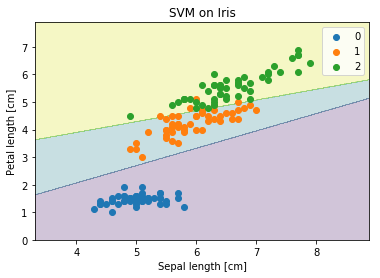

In [42]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

# Loading some example dat
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier, clf
svc = LinearSVC(C=2, penalty='l2', loss='squared_hinge')
svc.fit(X, y)

# Plotting decision boundary
plot_decision_boundary(X, y, clf=svc)